In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"holilhaq","key":"2aaeab46052bdafca15da88310352152"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d chetankv/dogs-cats-images

 98% 426M/435M [00:03<00:00, 129MB/s]
100% 435M/435M [00:03<00:00, 123MB/s]


In [ ]:
# unzip dataset
import os
import zipfile
local_zip = '/content/dogs-cats-images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
os.listdir('/content/dataset/test_set/')
os.listdir('/content/dataset/training_set/')

['cats', 'dogs']

In [ ]:
# training
print('total gambar kucing train: ', len(os.listdir('/content/dataset/training_set/cats')))
print('total gambar anjing train: ', len(os.listdir('/content/dataset/training_set/dogs')))
# test
print('total gambar kucing validation: ', len(os.listdir('/content/dataset/test_set/cats')))
print('total gambar anjing validation: ', len(os.listdir('/content/dataset/test_set/dogs')))

total gambar kucing train:  4000
total gambar anjing train:  4000
total gambar kucing validation:  1000
total gambar anjing validation:  1000


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 

train_dir = os.path.join('/content/dataset/training_set')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode = 'nearest')

val_dir = os.path.join('/content/dataset/test_set')
val_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    class_mode='binary')
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(100, 100),
    class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
    import tensorflow as tf
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
    ])

In [ ]:
    model.compile(optimizer=tf.optimizers.Adam(),
                  loss='binary_crossentropy',
                  metrics = ['accuracy'])

In [ ]:
    class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.85 and logs.get('val_accuracy')>0.85):
          print("\nAkurasi telah mencapai > 85%!")
          self.model.stop_training = True
    callbacks = myCallback()

In [59]:
    history = model.fit(train_generator,
                                  validation_data=validation_generator,
                                  epochs=40, batch_size=2000,
                                  verbose=1, callbacks=[callbacks])

Epoch 1/40
250/250 [==============================] - 208s 832ms/step - loss: 0.6188 - accuracy: 0.6606 - val_loss: 0.5789 - val_accuracy: 0.6985
Epoch 2/40
250/250 [==============================] - 215s 858ms/step - loss: 0.5789 - accuracy: 0.6984 - val_loss: 0.5603 - val_accuracy: 0.7285
Epoch 3/40
250/250 [==============================] - 217s 868ms/step - loss: 0.5408 - accuracy: 0.7274 - val_loss: 0.5411 - val_accuracy: 0.7360
Epoch 4/40
250/250 [==============================] - 210s 839ms/step - loss: 0.5238 - accuracy: 0.7368 - val_loss: 0.5065 - val_accuracy: 0.7550
Epoch 5/40
250/250 [==============================] - 214s 856ms/step - loss: 0.4941 - accuracy: 0.7594 - val_loss: 0.4932 - val_accuracy: 0.7745
Epoch 6/40
250/250 [==============================] - 214s 855ms/step - loss: 0.4770 - accuracy: 0.7673 - val_loss: 0.4665 - val_accuracy: 0.7840
Epoch 7/40
250/250 [==============================] - 208s 833ms/step - loss: 0.4663 - accuracy: 0.7726 - val_loss: 0.4598 -

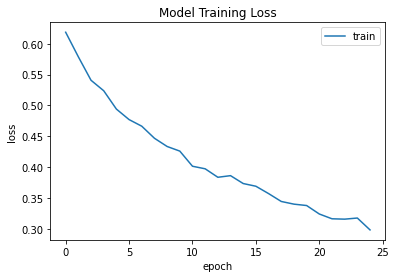

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

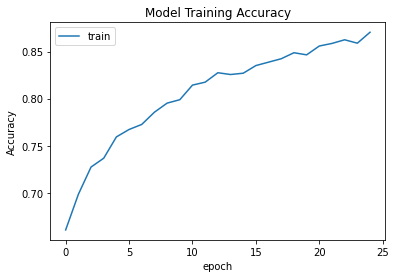

In [61]:
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

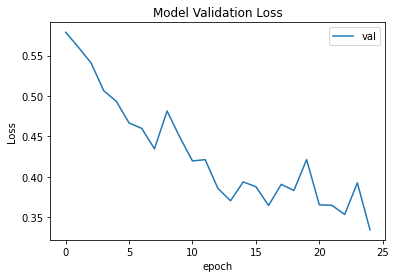

In [62]:
plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['val'], loc='upper right')
plt.show()

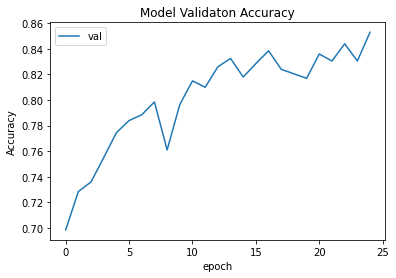

In [63]:
plt.plot(history.history['val_accuracy'])
plt.title('Model Validaton Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['val'], loc='upper left')
plt.show()

In [64]:
# mengubah model ke tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpu2_h4lnd/assets


In [65]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
    f.write(tflite_model)